In [ ]:
!pip install fluidsim
!pip install fluidfft
!pip install pyfftw

# Artificial data using Navier-Stocks-based simulation libraries

The first part of this project is focused on testing if the models can generalize data consisting of simulations calculated starting with a randomly-initialized frame

## Generating Simulation frames for testing purposes

I am mostly working fully in notebooks since it is easier to modify things all over the code for now, so I hope it is fine, that some code from distinct files is just a copy-paste from this. This notebook is for demonstration purposes to show the idea of a future pipeline.

*************************************
Program fluidsim
To plot the forcing modes, you can use:
sim.forcing.forcing_maker.plot_forcing_region()
sim:                <class 'fluidsim.solvers.ns2d.solver.Simul'>
sim.output:         <class 'fluidsim.solvers.ns2d.output.Output'>
sim.oper:           <class 'fluidsim.operators.operators2d.OperatorsPseudoSpectral2D'>
sim.state:          <class 'fluidsim.solvers.ns2d.state.StateNS2D'>
sim.time_stepping:  <class 'fluidsim.base.time_stepping.pseudo_spect.TimeSteppingPseudoSpectral'>
sim.init_fields:    <class 'fluidsim.solvers.ns2d.init_fields.InitFieldsNS2D'>
sim.forcing:        <class 'fluidsim.solvers.ns2d.forcing.ForcingNS2D'>

solver NS2D, RK4 and sequential,
type fft: fluidfft.fft2d.with_pyfftw
nx =     64 ; ny =     64
lx = 10 ; ly = 10
path_run =
/root/Sim_data/NS2D_ocean_currents_64x64_S10x10_2025-03-10_20-58-28
init_fields.type: dipole

Initialization outputs:
sim.output.increments:        <class 'fluidsim.base.output.increments.Incremen

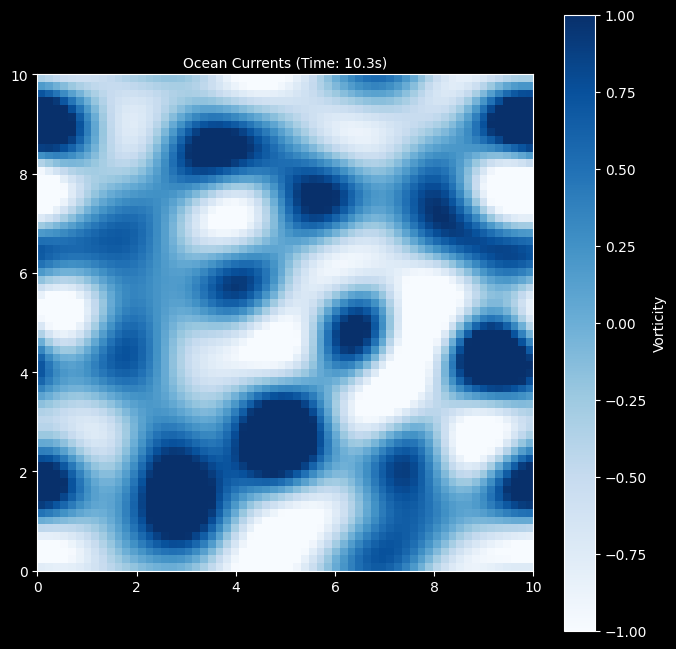

In [3]:
import os
import fluiddyn as fld
from fluidsim.solvers.ns2d.solver import Simul
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import Video

t_end = 10.0
nh = 64
Lh = 10.0 

params = Simul.create_default_params()

params.short_name_type_run = "ocean_currents"
params.oper.nx = params.oper.ny = nh
params.oper.Lx = params.oper.Ly = Lh

params.nu_8 = 1e-4
params.forcing.forcing_rate = 0.1
params.time_stepping.t_end = t_end
params.init_fields.type = "dipole" 
params.forcing.enable = True
params.forcing.type = "tcrandom"

params.output.ONLINE_PLOT_OK = False
params.output.periods_plot.phys_fields = 0.0
params.output.periods_save.phys_fields = 0.0

sim = Simul(params)

output_dir = "training_data"
os.makedirs(output_dir, exist_ok=True)

frames = []
current_time = 0.0
dt_frame = 0.1

def create_frame():
    plt.style.use("dark_background")
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(0, Lh)
    ax.set_ylim(0, Lh)
    ax.set_aspect("equal")
    ax.set_facecolor("midnightblue")
    return fig, ax

fig, ax = create_frame()
im = ax.imshow(np.zeros((nh, nh)), cmap="Blues", extent=[0, Lh, 0, Lh], vmin=-1, vmax=1)
plt.colorbar(im, label="Vorticity")
title = ax.set_title("Ocean Currents (Time: 0.0s)")

frame_count = 0
def update(frame):
    global current_time, frame_count
    while sim.time_stepping.t < current_time:
        sim.time_stepping.one_time_step()
    current_time += dt_frame
    
    vorticity = sim.state.get_var("rot")
    im.set_array(vorticity)
    title.set_text(f"Ocean Currents (Time: {current_time:.1f}s)")
    
    np.save(os.path.join(output_dir, f"frame_{frame_count:04d}.npy"), vorticity)
    frame_count += 1
    return im, title

ani = FuncAnimation(fig, update, frames=int(t_end / dt_frame), interval=100, blit=True)

output_path = "ocean_currents.mp4"
writer = FFMpegWriter(fps=10, metadata=dict(artist="You"), bitrate=1800)
ani.save(output_path, writer=writer)
Video(output_path, embed=True)


In [2]:
import os
import numpy as np
from fluidsim.solvers.ns2d.solver import Simul

t_end = 100.0 
nh = 64
Lh = 10.0
dt_frame = 0.1
output_dir = "ocean_currents_dataset"

params = Simul.create_default_params()
params.short_name_type_run = "ocean_currents"
params.oper.nx = params.oper.ny = nh
params.oper.Lx = params.oper.Ly = Lh
params.nu_8 = 1e-4
params.forcing.forcing_rate = 0.1
params.time_stepping.t_end = t_end
params.init_fields.type = "dipole" 
params.forcing.enable = True
params.forcing.type = "tcrandom"

os.makedirs(output_dir, exist_ok=True)
sim = Simul(params)

current_time = 0.0
frame_count = 0

while sim.time_stepping.t < t_end:
    sim.time_stepping.one_time_step()
    
    if sim.time_stepping.t >= current_time:
        vorticity = sim.state.get_var("rot")
        np.savez_compressed(
            os.path.join(output_dir, f"frame_{frame_count:04d}.npz"),
            vorticity=vorticity,
            time=current_time
        )
        current_time += dt_frame
        frame_count += 1

*************************************
Program fluidsim
To plot the forcing modes, you can use:
sim.forcing.forcing_maker.plot_forcing_region()
sim:                <class 'fluidsim.solvers.ns2d.solver.Simul'>
sim.output:         <class 'fluidsim.solvers.ns2d.output.Output'>
sim.oper:           <class 'fluidsim.operators.operators2d.OperatorsPseudoSpectral2D'>
sim.state:          <class 'fluidsim.solvers.ns2d.state.StateNS2D'>
sim.time_stepping:  <class 'fluidsim.base.time_stepping.pseudo_spect.TimeSteppingPseudoSpectral'>
sim.init_fields:    <class 'fluidsim.solvers.ns2d.init_fields.InitFieldsNS2D'>
sim.forcing:        <class 'fluidsim.solvers.ns2d.forcing.ForcingNS2D'>

solver NS2D, RK4 and sequential,
type fft: fluidfft.fft2d.with_pyfftw
nx =     64 ; ny =     64
lx = 10 ; ly = 10
path_run =
/root/Sim_data/NS2D_ocean_currents_64x64_S10x10_2025-03-26_15-12-54
init_fields.type: dipole

Initialization outputs:
sim.output.increments:        <class 'fluidsim.base.output.increments.Incremen

## Using convolutional lstm to estimate the simulations

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    ConvLSTM2D, BatchNormalization, Conv2D, TimeDistributed
)

def build_convlstm_model(input_shape=(9, 64, 64, 1), output_frames=9):
    model = Sequential([
        ConvLSTM2D(64, kernel_size=(5, 5), padding='same', 
                  return_sequences=True, input_shape=input_shape),
        BatchNormalization(),
        ConvLSTM2D(64, kernel_size=(3, 3), padding='same', return_sequences=True),
        BatchNormalization(),
        
        ConvLSTM2D(64, kernel_size=(3, 3), padding='same', return_sequences=True),
        BatchNormalization(),
        TimeDistributed(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')),
        TimeDistributed(Conv2D(1, kernel_size=(3, 3), padding='same', activation='tanh'))
    ])
    return model

In [10]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

def load_and_prepare_data(data_dir, sequence_length=10):
    files = sorted([f for f in os.listdir(data_dir) if f.endswith('.npz')])
    sequences = []
    
    for i in range(len(files) - sequence_length):
        sequence = []
        for j in range(sequence_length):
            data = np.load(os.path.join(data_dir, files[i+j]))
            vorticity = data['vorticity']
            sequence.append(vorticity)
        sequences.append(np.array(sequence))
    
    sequences = np.array(sequences)
    sequences = sequences[..., np.newaxis]
    
    X = sequences[:, :-1]
    y = sequences[:, 1:]
    
    return X, y

X_train, y_train = load_and_prepare_data("ocean_currents_dataset")
X_test, y_test = load_and_prepare_data("ocean_currents_dataset")  # When dealing with real data I split it properly

model = build_convlstm_model(input_shape=(9, 64, 64, 1), output_frames=9)
model.compile(optimizer='adam', loss='mse')

# Train directly without generator (for simplicity)
history = model.fit(
    X_train, y_train,
    batch_size=8,
    epochs=3,
    validation_data=(X_test, y_test)
)

Epoch 1/3
124/124 ━━━━━━━━━━━━━━━━━━━━ 59s 397ms/step - loss: 0.1391 - val_loss: 0.3619
Epoch 2/3
124/124 ━━━━━━━━━━━━━━━━━━━━ 42s 339ms/step - loss: 0.0423 - val_loss: 0.2659
Epoch 3/3
124/124 ━━━━━━━━━━━━━━━━━━━━ 42s 338ms/step - loss: 0.0400 - val_loss: 0.1371


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


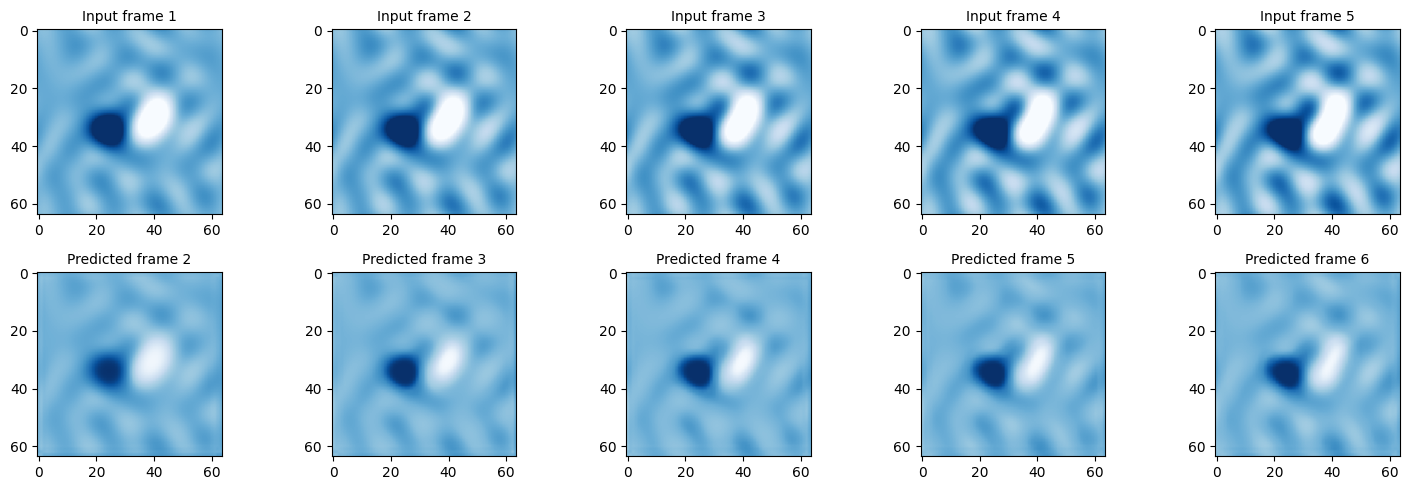

In [12]:
from matplotlib import pyplot as plt
test_pred = model.predict(X_test[:1])  # Predict on first test sequence

# Visualize first 5 frames of prediction vs real data
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[0, i, ..., 0], cmap='Blues', vmin=-1, vmax=1)
    plt.title(f"Input frame {i+1}")
    plt.subplot(2, 5, i+6)
    plt.imshow(test_pred[0, i, ..., 0], cmap='Blues', vmin=-1, vmax=1)
    plt.title(f"Predicted frame {i+2}")
plt.tight_layout()
plt.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Visualizing simulation vs prediction frames as video
def visualize_results_as_video(X_test, y_test, predictions, sample_idx=0):
    input_frames = X_test[sample_idx]
    next_frame_true = y_test[sample_idx, -1:]
    next_frame_pred = predictions[sample_idx, -1:]
    
    # Create sequences for visualization
    real_sequence = np.concatenate([input_frames, next_frame_true], axis=0)
    pred_sequence = np.concatenate([input_frames, next_frame_pred], axis=0)
    
    # Squeeze dimension if needed (do not remember if actually used)
    if real_sequence.ndim == 4 and real_sequence.shape[-1] == 1:
        real_sequence = real_sequence[..., 0]
        pred_sequence = pred_sequence[..., 0]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    im1 = ax1.imshow(real_sequence[0], cmap='Blues', vmin=-1, vmax=1)
    im2 = ax2.imshow(pred_sequence[0], cmap='Blues', vmin=-1, vmax=1)
    ax1.set_title("Real Ocean Currents")
    ax2.set_title("Predicted Currents")
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    
    def update(frame):
        im1.set_array(real_sequence[frame])
        im2.set_array(pred_sequence[frame])
        ax1.set_xlabel(f"Frame {frame+1}/{len(real_sequence)}")
        ax2.set_xlabel(f"Frame {frame+1}/{len(pred_sequence)}")
        return im1, im2
    
    # Create animation
    ani = FuncAnimation(
        fig, update, frames=len(real_sequence), 
        interval=200, blit=True
    )
    
    plt.close()
    
    return HTML(ani.to_html5_video())

predictions = model.predict(X_test)
visualize_results_as_video(X_test, y_test, predictions)

31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step


As you can see, even a very simple convlstm model works quite well, but questions are still present if this is going to work with real data, which will be much more and require more complex generalization

# Training and comparing models using real-world data

As a dataset copernicus hourly data was chosen. Copernicusmarine is the best way to get access to the data, had to test a lot of options though.

In [1]:
!pip install copernicusmarine

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 80.1 MB/s eta 0:00:00:00:0100:01
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=cdd48cf2f6072ec508d75b776afe299ff5fe7d94039c97d18838cdb1e9e12d14
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree


In [2]:
import copernicusmarine

copernicusmarine.login(username='nrashkin', password='DWSFYSnRYurJ2Vx')

INFO - 2025-04-08T10:40:16Z - Credentials file stored in /root/.copernicusmarine/.copernicusmarine-credentials.


True

In [3]:
catalog = copernicusmarine.describe(contains=['GLOBAL_ANALYSISFORECAST_PHY_001_024'], disable_progress_bar=True)
print([dataset.dataset_id for dataset in [product.datasets for product in catalog.products][0]])

['cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m', 'cmems_mod_glo_phy-cur_anfc_0.083deg_P1M-m', 'cmems_mod_glo_phy-cur_anfc_0.083deg_PT6H-i', 'cmems_mod_glo_phy-so_anfc_0.083deg_P1D-m', 'cmems_mod_glo_phy-so_anfc_0.083deg_P1M-m', 'cmems_mod_glo_phy-so_anfc_0.083deg_PT6H-i', 'cmems_mod_glo_phy-thetao_anfc_0.083deg_P1D-m', 'cmems_mod_glo_phy-thetao_anfc_0.083deg_P1M-m', 'cmems_mod_glo_phy-thetao_anfc_0.083deg_PT6H-i', 'cmems_mod_glo_phy-wcur_anfc_0.083deg_P1D-m', 'cmems_mod_glo_phy-wcur_anfc_0.083deg_P1M-m', 'cmems_mod_glo_phy_anfc_0.083deg-climatology-uncertainty_P1M-m', 'cmems_mod_glo_phy_anfc_0.083deg-sst-anomaly_P1D-m', 'cmems_mod_glo_phy_anfc_0.083deg-sst-anomaly_P1M-m', 'cmems_mod_glo_phy_anfc_0.083deg_P1D-m', 'cmems_mod_glo_phy_anfc_0.083deg_P1M-m', 'cmems_mod_glo_phy_anfc_0.083deg_PT1H-m', 'cmems_mod_glo_phy_anfc_0.083deg_static', 'cmems_mod_glo_phy_anfc_merged-sl_PT1H-i', 'cmems_mod_glo_phy_anfc_merged-uv_PT1H-i']


In [4]:
from copernicusmarine import open_dataset

ds = open_dataset(
    dataset_id="cmems_mod_glo_phy_anfc_merged-uv_PT1H-i",
    variables=["uo", "vo"], # Getting speed by components
    start_datetime="2024-01-01T00:00:00",
    end_datetime="2024-03-01T00:00:00",# 24 hours
    minimum_latitude=30,
    maximum_latitude=45,
    minimum_longitude=-70,
    maximum_longitude=-50,
    minimum_depth=0,
    maximum_depth=1,
    chunk_size_limit=500
)

# Calculating vorticity
dx = 111.32 * 1000 * abs(float(ds.longitude[1] - ds.longitude[0]))
ds['vorticity'] = (ds.vo.differentiate('longitude') - ds.uo.differentiate('latitude')) / dx

INFO - 2025-04-08T10:40:50Z - Selected dataset version: "202211"
INFO - 2025-04-08T10:40:50Z - Selected dataset part: "default"
WARNING - 2025-04-08T10:40:58Z - Some of your subset selection [0, 1] for the depth dimension exceed the dataset coordinates [0.49402499198913574, 0.49402499198913574]


In [5]:
ds.head()

<xarray.Dataset> Size: 2kB
Dimensions:    (time: 5, depth: 1, latitude: 5, longitude: 5)
Coordinates:
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 20B 30.0 30.08 30.17 30.25 30.33
  * longitude  (longitude) float32 20B -70.0 -69.92 -69.83 -69.75 -69.67
  * time       (time) datetime64[ns] 40B 2024-01-01 ... 2024-01-01T04:00:00
Data variables:
    uo         (time, depth, latitude, longitude) float32 500B dask.array<chunksize=(5, 1, 5, 5), meta=np.ndarray>
    vo         (time, depth, latitude, longitude) float32 500B dask.array<chunksize=(5, 1, 5, 5), meta=np.ndarray>
    vorticity  (time, depth, latitude, longitude) float32 500B dask.array<chunksize=(5, 1, 5, 5), meta=np.ndarray>
Attributes:
    source:       MERCATOR GLO12, mfwamglo, FES2014
    institution:  MERCATOR OCEAN
    credit:       E.U. Copernicus Marine Service Information (CMEMS)
    producer:     CMEMS - Global Monitoring and Forecasting Centre
    Conventions:  CF-1.6
    contact:      servicedesk.cmems@mercator-ocean.eu
    title:        hourly mean merged surface currents from oceanic circulatio...
    references:   http://marine.copernicus.eu


Selecting surface vorticity
Dataset size: 0.75 GB

Normalizing data


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


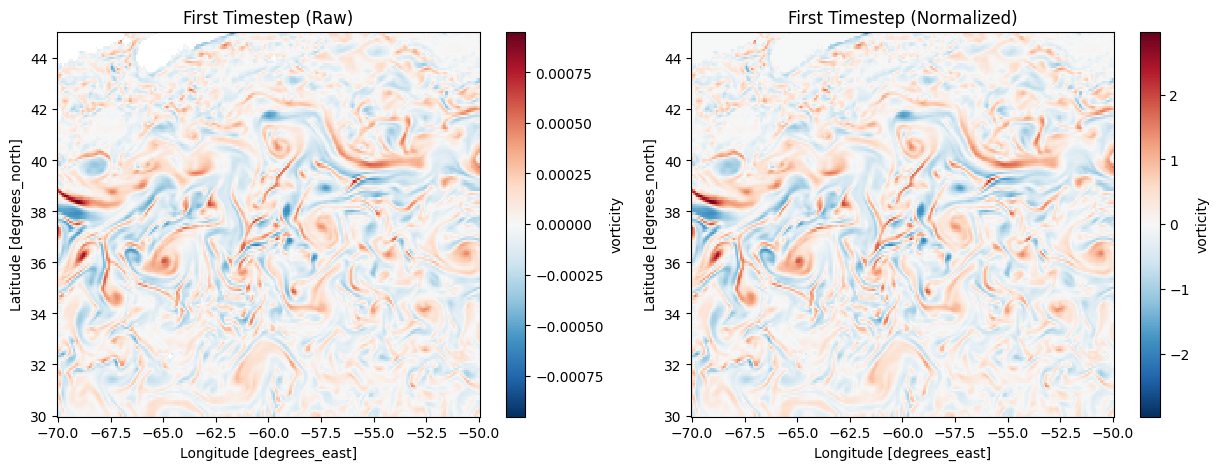


Extracting 64x64 patches

Splitting dataset
• Training sequences: 8574 (shape: (8574, 9, 64, 64, 1))
• Test sequences: 12 (shape: (12, 9, 64, 64, 1))
• Patch size: 64x64


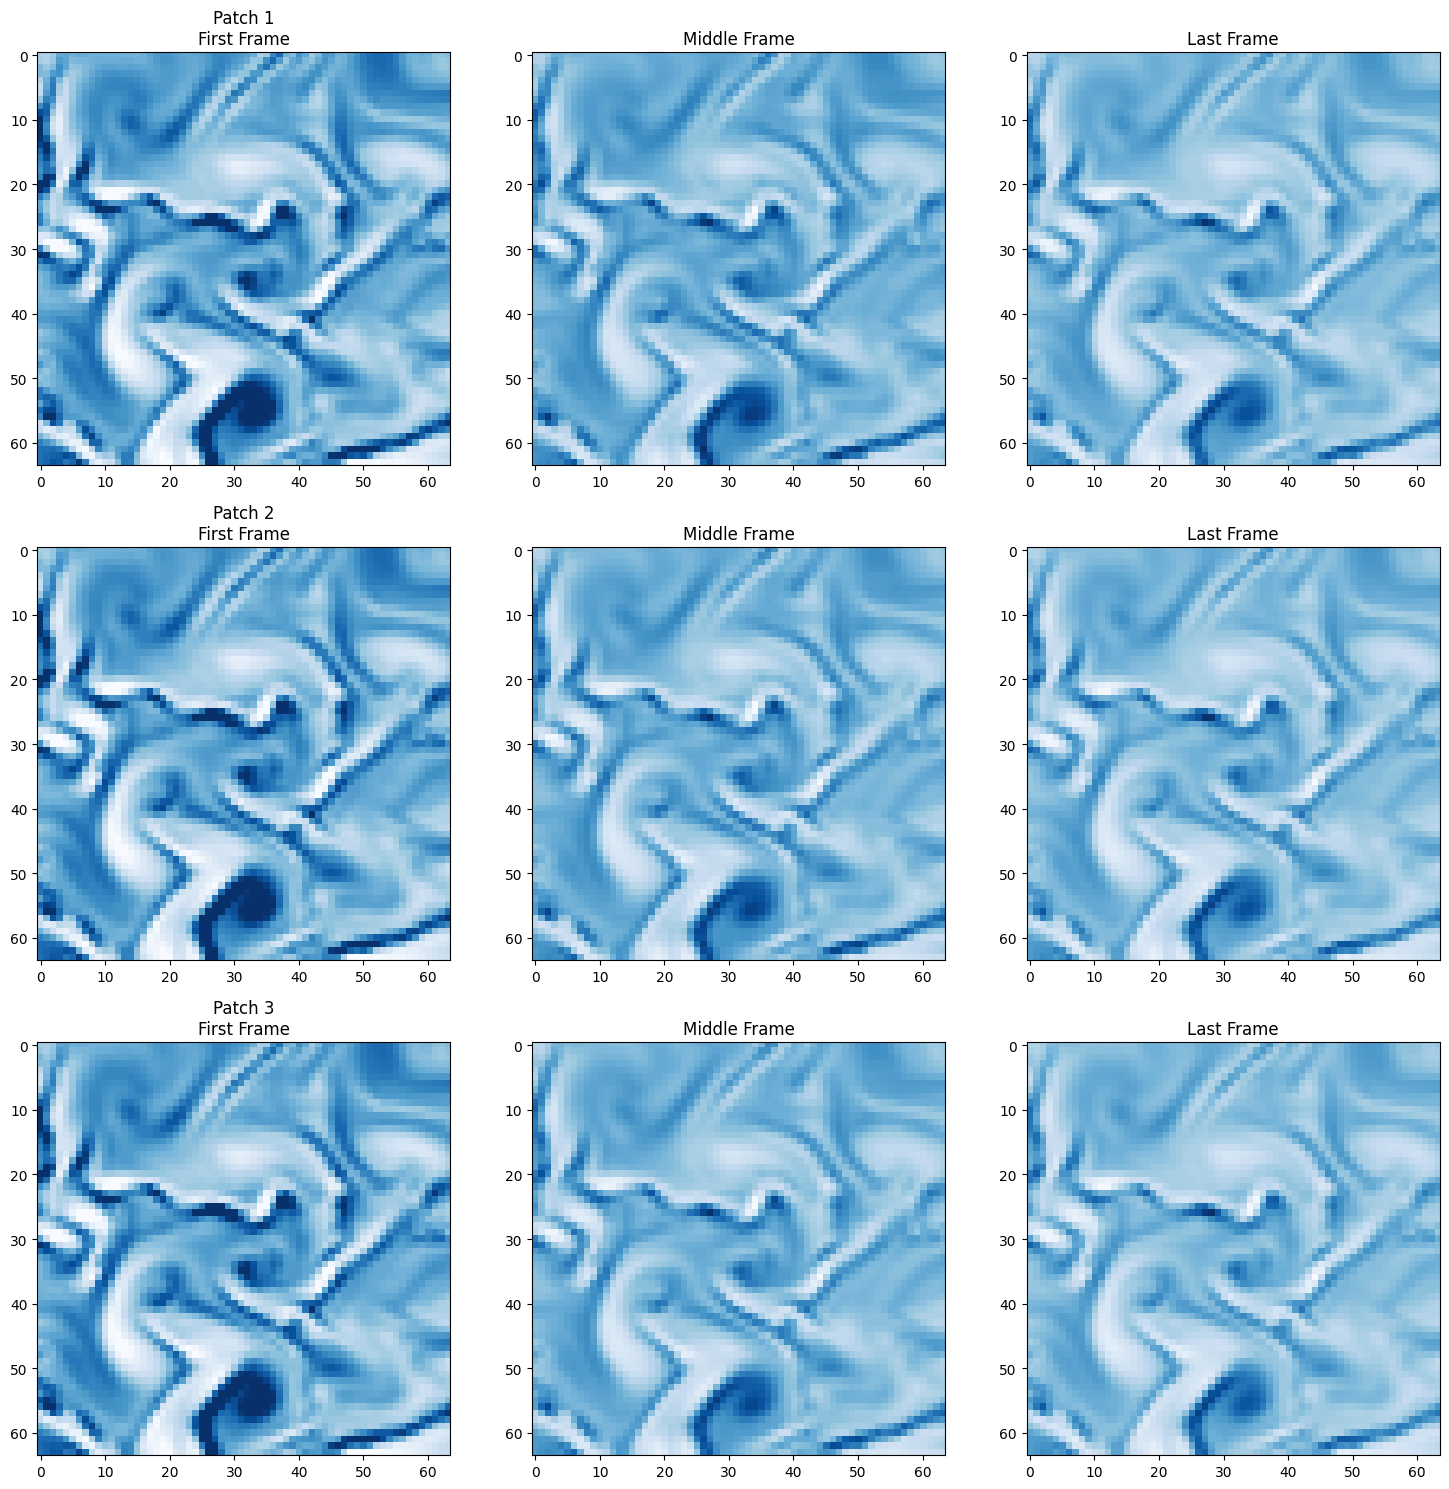

In [6]:
import numpy as np
import xarray as xr
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# To get the most out of the limited data, I split the areas into patches that serve as a separate data points
def extract_patches(arr, patch_size=64, seq_length=10):
    n_timesteps, height, width = arr.shape
    patches = []
    
    # Calculate number of patches with no overlapping
    n_h = height // patch_size
    n_w = width // patch_size
    
    for i in range(n_h):
        for j in range(n_w):
            patch = arr[:, 
                       i*patch_size:(i+1)*patch_size,
                       j*patch_size:(j+1)*patch_size]
            
            # Create sequences within current patch
            for t in range(n_timesteps - seq_length):
                patches.append(patch[t:t+seq_length])
    
    return np.array(patches)[..., np.newaxis]

def prepare_cmems_data_with_progress(ds, seq_length=10, patch_size=64, plot_samples=3):
    progress = {
        'current_operation': 'Initializing...',
        'completed': 0
    }
    
    def update_progress(operation):
        progress['current_operation'] = operation
        print(f"\n{operation}")
    
    update_progress("Selecting surface vorticity")
    print(f"Dataset size: {ds.nbytes/1e9:.2f} GB")
    
    if ds.nbytes > 5e9:
        ds = ds.chunk({'time': 24})
    
    vort = ds['vorticity'].isel(depth=0)
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    vort.isel(time=0).plot(ax=ax[0])
    ax[0].set_title("First Timestep (Raw)")

    def safe_normalize(da):
        da = da.where(np.isfinite(da), 0)
        mean = da.mean().values
        std = da.std().values
        std = std if std > 1e-8 else 1.0
        return ((da - mean) / (2 * std)).clip(-5, 5)
    
    update_progress("Normalizing data")
    vort_norm = safe_normalize(vort)
    vort_norm.isel(time=0).plot(ax=ax[1])
    ax[1].set_title("First Timestep (Normalized)")
    plt.show()
    
    vort_norm_values = vort_norm.transpose('time', 'latitude', 'longitude').values
    
    update_progress(f"Extracting {patch_size}x{patch_size} patches")
    arr = extract_patches(vort_norm_values, patch_size, seq_length)
    
    update_progress("Splitting dataset")
    test_size = min(12, len(arr)//5)
    X_train, X_test = arr[:-test_size, :-1], arr[-test_size:, :-1]
    y_train, y_test = arr[:-test_size, 1:], arr[-test_size:, 1:]
    
    print(f"• Training sequences: {len(X_train)} (shape: {X_train.shape})")
    print(f"• Test sequences: {len(X_test)} (shape: {X_test.shape})")
    print(f"• Patch size: {patch_size}x{patch_size}")
    
    plot_sample_patches(X_train, plot_samples)
    return X_train, X_test, y_train, y_test

def plot_sample_patches(patches, n_samples=3):
    plt.figure(figsize=(15, 5*n_samples))
    
    for i in range(min(n_samples, len(patches))):
        plt.subplot(n_samples, 3, i*3+1)
        plt.imshow(patches[i + 10,0,...,0], cmap='Blues', vmin=-1, vmax=1)
        plt.title(f"Patch {i+1}\nFirst Frame")
        
        plt.subplot(n_samples, 3, i*3+2)
        plt.imshow(patches[i,len(patches[i])//2,...,0], cmap='Blues')
        plt.title("Middle Frame")
        
        plt.subplot(n_samples, 3, i*3+3)
        plt.imshow(patches[i,-1,...,0], cmap='Blues')
        plt.title("Last Frame")
    
    plt.tight_layout()
    plt.show()

try:
    X_train, X_test, y_train, y_test = prepare_cmems_data_with_progress(ds, patch_size=64)
except Exception as e:
    print(f"Error during processing: {str(e)}")

In [7]:
from scipy import ndimage

def handle_nans(data_array, fill_value=0.0):
    print("Interpolating NaNs")
    mask = np.isnan(data_array)
    data_array[mask] = ndimage.gaussian_filter(
        np.nan_to_num(data_array, nan=0), 
        sigma=2, 
        mode='nearest'
    )[mask]
    return data_array

# There are a lot of nans in the data for obvious reasons, so interpolating seems to be the best solution here
X_train = handle_nans(X_train)
y_train = handle_nans(y_train)
X_test = handle_nans(X_test)
y_test = handle_nans(y_test)

print(f"NaN in X_train: {np.isnan(X_train).sum()}")
print(f"NaN in y_train: {np.isnan(y_train).sum()}")
print(f"X range: [{X_train.min():.3f}, {X_train.max():.3f}]")

Interpolating NaNs
Interpolating NaNs
Interpolating NaNs
Interpolating NaNs
NaN in X_train: 0
NaN in y_train: 0
X range: [-3.315, 5.000]


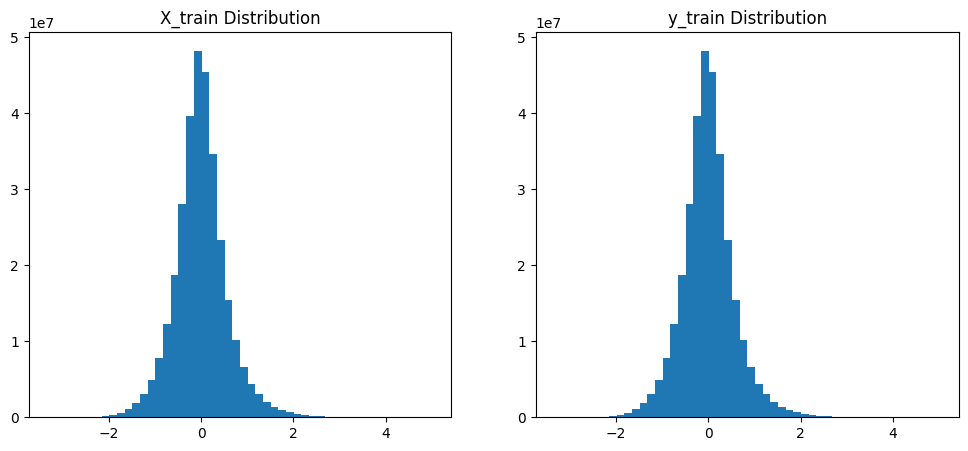

In [8]:
def validate_training_data(X_train, y_train):
    # Plot sample distributions as a sanity check
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.hist(X_train.flatten(), bins=50)
    plt.title("X_train Distribution")
    plt.subplot(122)
    plt.hist(y_train.flatten(), bins=50)
    plt.title("y_train Distribution")
    plt.show()

validate_training_data(X_train, y_train)

# ConvLSTM

This is a check that models can generalize the real ocean data well. This step is needed to have some expectations regarding the size of generative models to find out if real world data is good enough to be used for generation of realistic sequences

Training data shape: (8574, 9, 64, 64, 1)
Test data shape: (12, 9, 64, 64, 1)
Input shape: (9, 64, 64, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_lstm2d_8 (ConvLSTM2D)           │ (None, 9, 64, 64, 32)       │          38,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 9, 64, 64, 32)       │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 9, 64, 64, 32)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_lstm2d_9 (ConvLSTM2D)           │ (None, 9, 64, 64, 32)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 9, 64, 64, 32)       │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 9, 64, 64, 1)        │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,545 (439.63 KB)

 Trainable params: 112,417 (439.13 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/10
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1299

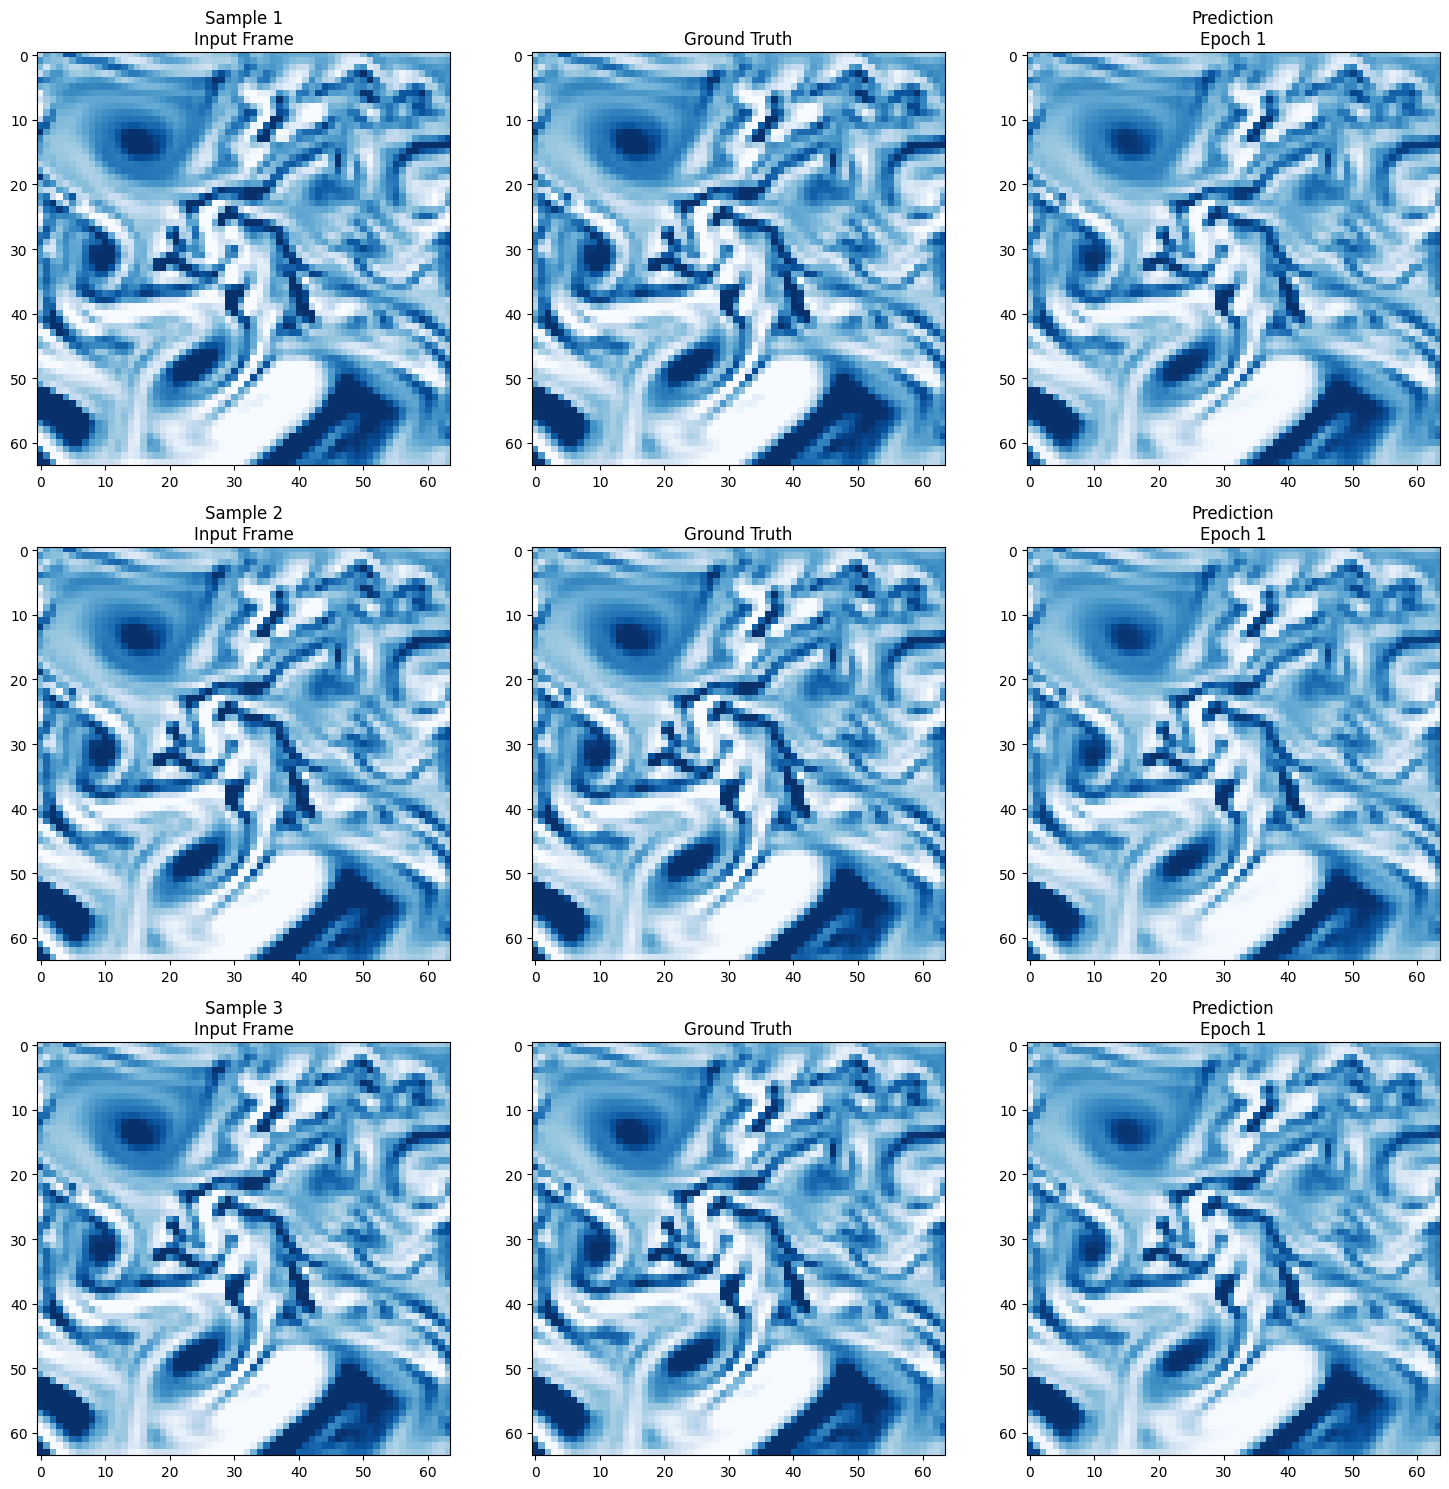

1072/1072 ━━━━━━━━━━━━━━━━━━━━ 91s 72ms/step - loss: 0.1299 - val_loss: 0.0997 - learning_rate: 0.0010
Epoch 2/10
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 64s 60ms/step - loss: 0.0728 - val_loss: 0.0850 - learning_rate: 0.0010
Epoch 3/10
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 64s 60ms/step - loss: 0.0621 - val_loss: 0.0955 - learning_rate: 0.0010
Epoch 4/10
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 64s 60ms/step - loss: 0.0582 - val_loss: 0.0864 - learning_rate: 0.0010
Epoch 5/10
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 64s 60ms/step - loss: 0.0552 - val_loss: 0.0768 - learning_rate: 0.0010
Epoch 6/10
1071/1072 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0534

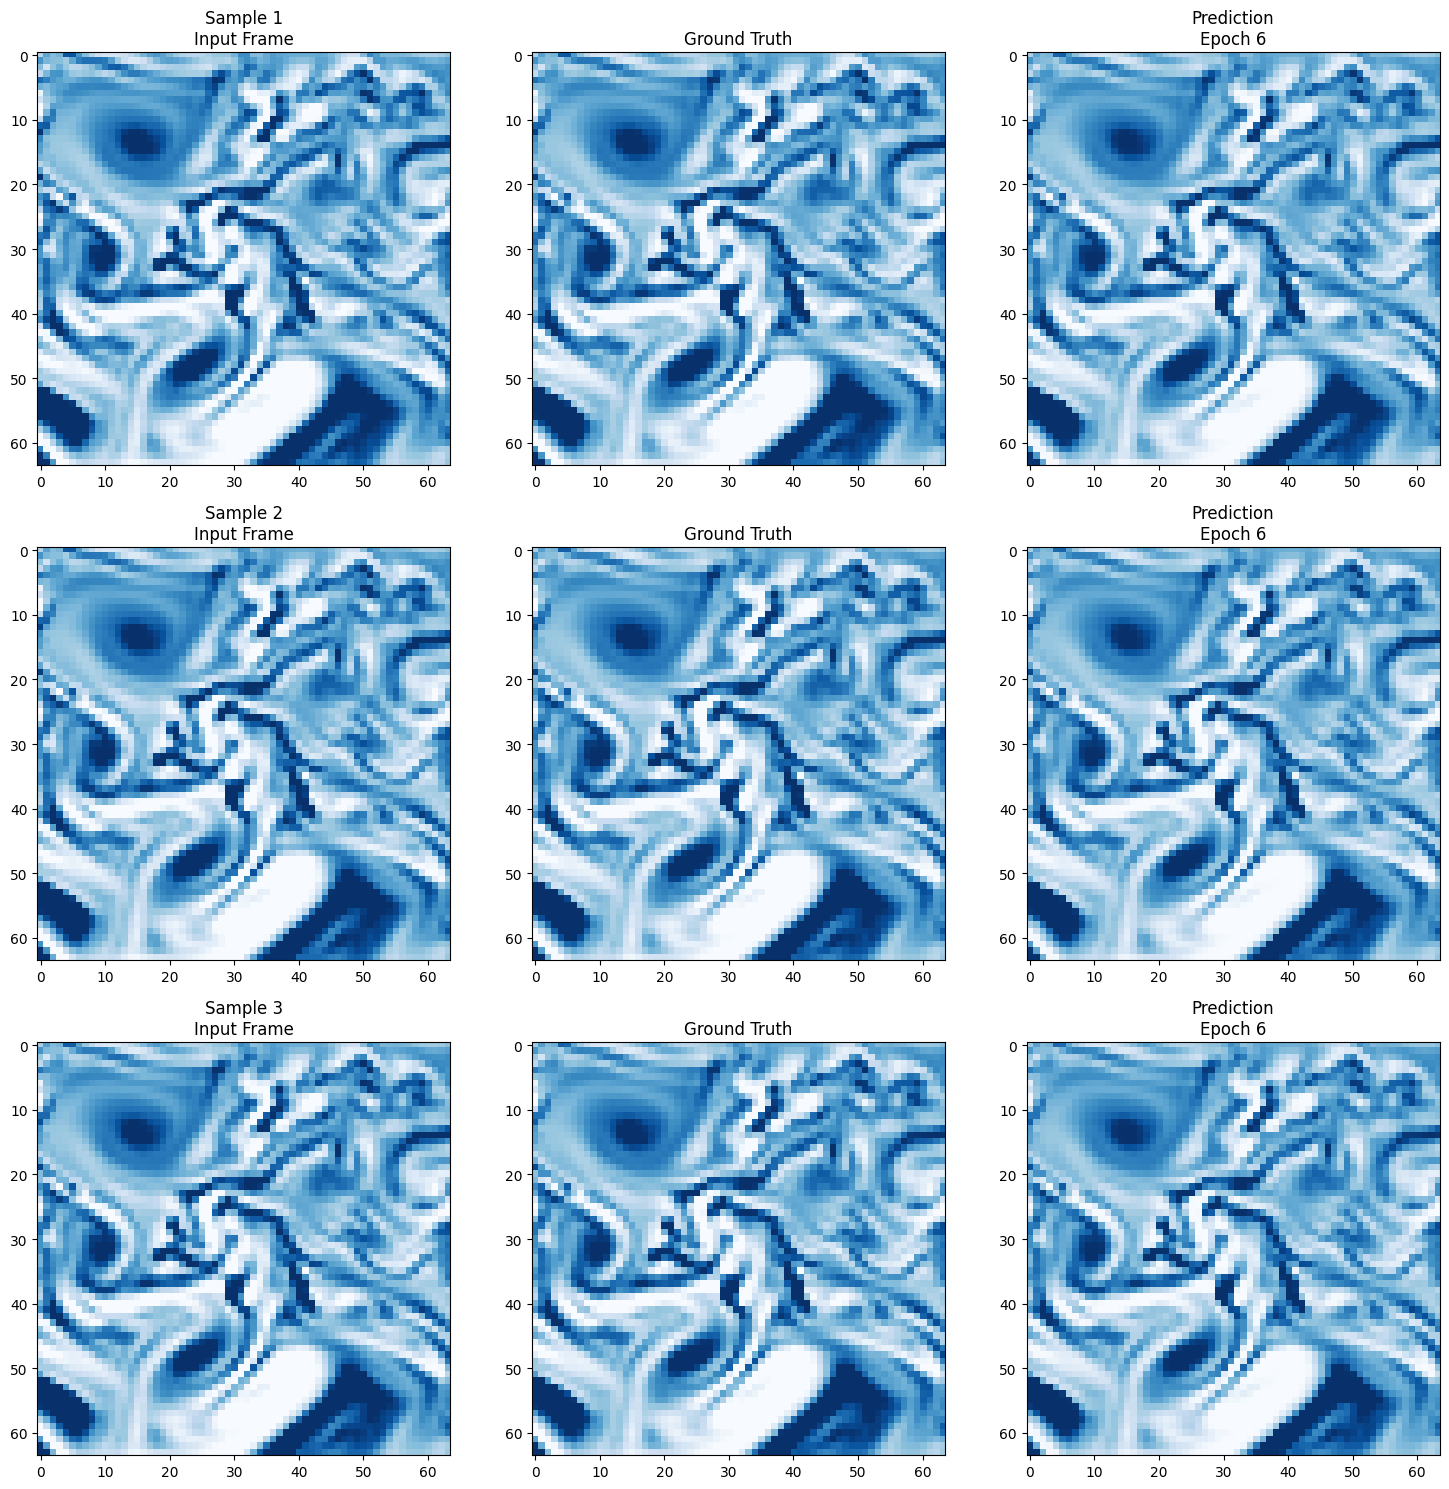

1072/1072 ━━━━━━━━━━━━━━━━━━━━ 66s 61ms/step - loss: 0.0534 - val_loss: 0.0788 - learning_rate: 0.0010
Epoch 7/10
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 64s 59ms/step - loss: 0.0515 - val_loss: 0.0807 - learning_rate: 0.0010
Epoch 8/10
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 64s 60ms/step - loss: 0.0502 - val_loss: 0.0677 - learning_rate: 0.0010
Epoch 9/10
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 64s 60ms/step - loss: 0.0501 - val_loss: 0.0692 - learning_rate: 0.0010
Epoch 10/10
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 64s 59ms/step - loss: 0.0490 - val_loss: 0.0703 - learning_rate: 0.0010


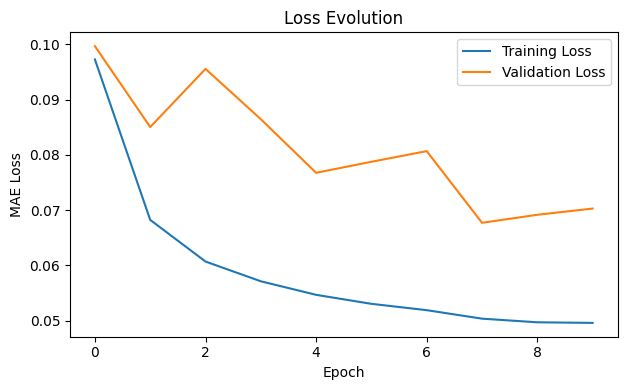

Training completed and model saved


In [25]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import (ModelCheckpoint, 
                                      TerminateOnNaN,
                                      ReduceLROnPlateau,
                                      EarlyStopping)
import numpy as np
import matplotlib.pyplot as plt

def build_patch_model(input_shape, filters=32):
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape, dtype='float32'),
        
        layers.ConvLSTM2D(
            filters, (3,3), padding='same',
            kernel_regularizer=regularizers.l2(1e-4),
            return_sequences=True
        ),
        layers.BatchNormalization(),
        layers.TimeDistributed(  # Wrapping dropout to handle temporal dimension
            layers.SpatialDropout2D(0.1)
        ),
        
        layers.ConvLSTM2D(
            filters, (3,3), padding='same',
            activation='tanh',
            return_sequences=True
        ),
        layers.BatchNormalization(),
        
        layers.TimeDistributed(
            layers.Conv2D(1, (3,3), padding='same', activation='tanh')
        )
    ])
    return model

def configure_training(model, initial_lr=1e-3):
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=initial_lr,
        global_clipnorm=1.0
    )
    
    callbacks = [
        TerminateOnNaN(),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=3,
            min_lr=1e-6,
            verbose=1
        ),
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        ),
        ModelCheckpoint(
            'best_patch_model.keras',
            monitor='val_loss',
            save_best_only=True
        )
    ]
    
    model.compile(optimizer=optimizer, loss='mae')
    return model, callbacks

class TrainingVisualizer(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, samples=3):
        self.X_val = X_val
        self.y_val = y_val
        self.samples = samples
        
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 5 == 0:
            preds = self.model.predict(self.X_val[:self.samples], verbose=0)
            plot_predictions(self.X_val[:self.samples], 
                            self.y_val[:self.samples], 
                            preds, 
                            epoch)

def plot_predictions(X, y_true, y_pred, epoch):
    plt.figure(figsize=(15, 5*len(X)))
    
    for i in range(len(X)):
        frame_idx = X.shape[1] // 2
        
        plt.subplot(len(X), 3, i*3+1)
        plt.imshow(X[i,frame_idx,...,0], cmap='Blues', vmin=-1, vmax=1)
        plt.title(f'Sample {i+1}\nInput Frame')
        
        plt.subplot(len(X), 3, i*3+2)
        plt.imshow(y_true[i,frame_idx,...,0], cmap='Blues', vmin=-1, vmax=1)
        plt.title('Ground Truth')
        
        plt.subplot(len(X), 3, i*3+3)
        plt.imshow(y_pred[i,frame_idx,...,0], cmap='Blues', vmin=-1, vmax=1)
        plt.title(f'Prediction\nEpoch {epoch+1}')
    
    plt.tight_layout()
    plt.show()

def train_patch_model(X_train, y_train, X_test, y_test, epochs=100, batch_size=8):
    input_shape = X_train.shape[1:]
    print(f"Input shape: {input_shape}")
    
    model = build_patch_model(input_shape)
    model.summary()
    
    model, callbacks = configure_training(model)
    callbacks.append(TrainingVisualizer(X_test, y_test))
    
    history = model.fit(
        X_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_test, y_test),
        callbacks=callbacks,
        verbose=1
    )
    
    plot_training_history(history)
    return model, history

def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(121)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Evolution')
    plt.xlabel('Epoch')
    plt.ylabel('MAE Loss')
    plt.legend()
    
    if 'lr' in history.history:
        plt.subplot(122)
        plt.plot(history.history['lr'])
        plt.title('Learning Rate Schedule')
        plt.xlabel('Epoch')
        plt.ylabel('Learning Rate')
        plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

try:
    print(f"Training data shape: {X_train.shape}")
    print(f"Test data shape: {X_test.shape}")
    
    model, history = train_patch_model(
        X_train, y_train, 
        X_test, y_test,
        epochs=10,
        batch_size=8
    )
    
    model.save('ocean_current_patch_model.keras')
    print("Training completed and model saved")
    
except Exception as e:
    print(f"Training failed: {str(e)}")

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from IPython.display import HTML
import os
from tqdm import tqdm

def create_prediction_video(model, X_sample, y_sample, output_path="prediction_video.mp4", fps=10):
    predictions = model.predict(X_sample[np.newaxis, ...])[0]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Ocean Current Prediction Comparison', fontsize=16)
    
    vmin, vmax = -1, 1
    im1 = ax1.imshow(X_sample[0,...,0], cmap='Blues', vmin=vmin, vmax=vmax)
    ax1.set_title('Input Frame')
    im2 = ax2.imshow(y_sample[0,...,0], cmap='Blues', vmin=vmin, vmax=vmax)
    ax2.set_title('Ground Truth')
    im3 = ax3.imshow(predictions[0,...,0], cmap='Blues', vmin=vmin, vmax=vmax)
    ax3.set_title('Model Prediction')
    
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    fig.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)
    
    def update(frame):
        im1.set_array(X_sample[frame,...,0])
        im2.set_array(y_sample[frame,...,0])
        im3.set_array(predictions[frame,...,0])
        for ax in [ax1, ax2, ax3]:
            ax.set_xlabel(f'Frame {frame+1}/{len(X_sample)}')
        return im1, im2, im3
    
    ani = animation.FuncAnimation(
        fig, 
        update, 
        frames=len(X_sample), 
        interval=1000/fps,
        blit=True
    )
    
    writer = animation.FFMpegWriter(
        fps=fps,
        metadata={'title': 'Ocean Current Prediction', 'artist': 'Model'},
        bitrate=1800
    )
    
    print(f"Saving video to {output_path}...")
    with tqdm(total=len(X_sample)) as pbar:
        ani.save(output_path, writer=writer, dpi=100, progress_callback=lambda i, n: pbar.update(1))
    
    plt.close()
    print("Video saved successfully!")
    
    return HTML(f"""
    <video width="800" controls>
      <source src="{output_path}" type="video/mp4">
    </video>
    """)

sample_idx = 0  
video_html = create_prediction_video(
    model, 
    X_test[sample_idx],
    y_test[sample_idx],
    output_path="ocean_current_prediction.mp4",
    fps=5
)

display(video_html)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Saving video to ocean_current_prediction.mp4...


100%|██████████| 9/9 [00:03<00:00,  2.72it/s]

Video saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step
Pearson_r: 0.9593
Energy_Correlation: 0.9941
Enstrophy_Correlation: 0.9941
Spectrum_Correlation: 0.9414


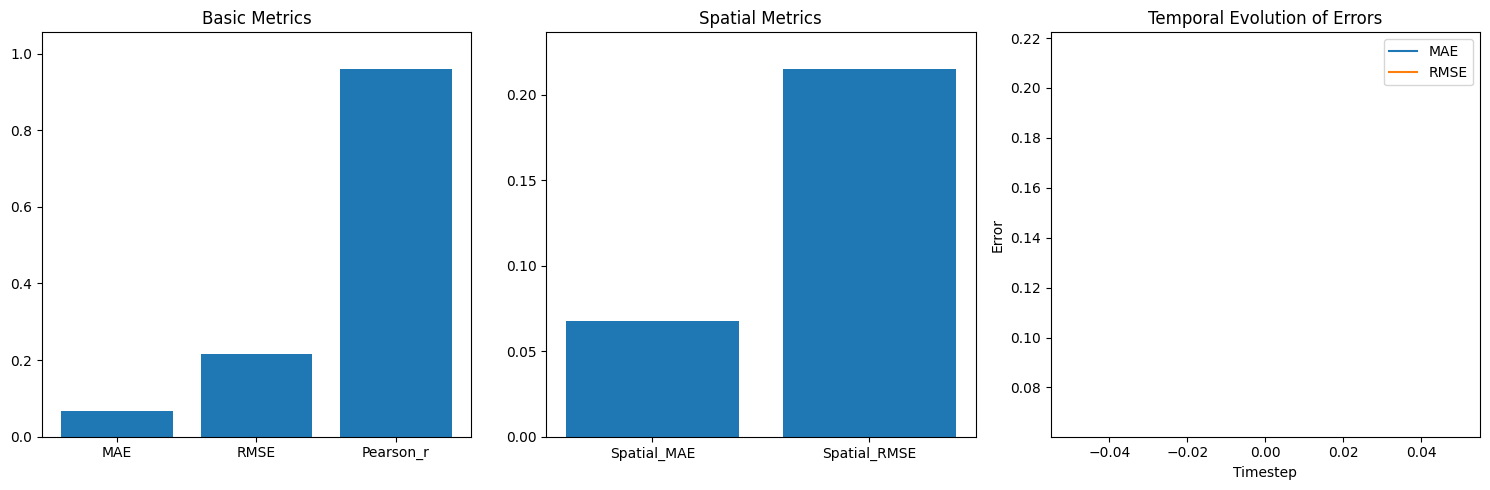

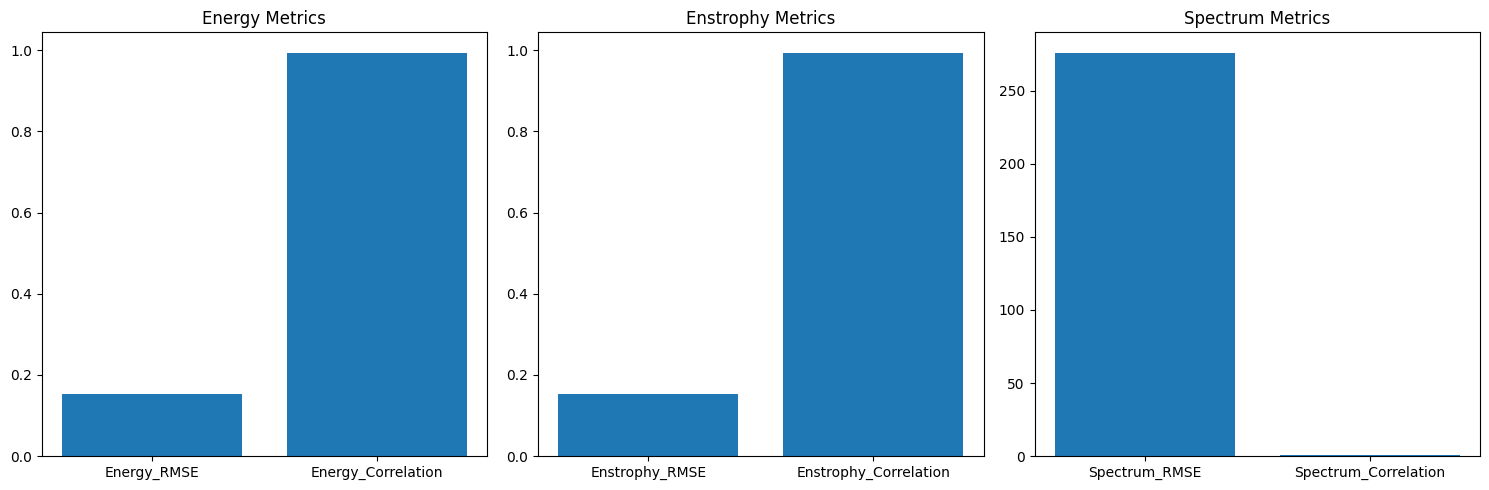

Metrics saved to model_metrics.json


In [27]:
import numpy as np
import xarray as xr
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def calculate_metrics(model, X_test, y_test):
    predictions = model.predict(X_test, verbose=1)
    
    y_true_flat = y_test.reshape(-1, y_test.shape[-1])
    y_pred_flat = predictions.reshape(-1, predictions.shape[-1])
    
    metrics = {
        'MAE': mean_absolute_error(y_true_flat, y_pred_flat),
        'RMSE': np.sqrt(mean_squared_error(y_true_flat, y_pred_flat)),
        'Pearson_r': pearsonr(y_true_flat.squeeze(), y_pred_flat.squeeze())[0],
    }
    
    spatial_mae = np.mean(np.abs(y_test - predictions), axis=(0,2,3,4))
    spatial_rmse = np.sqrt(np.mean((y_test - predictions)**2, axis=(0,2,3,4)))
    metrics.update({
        'Spatial_MAE': np.mean(spatial_mae),
        'Spatial_RMSE': np.mean(spatial_rmse),
        'Temporal_MAE': np.mean(spatial_mae, axis=0),
        'Temporal_RMSE': np.mean(spatial_rmse, axis=0)
    })
    
    metrics.update(calculate_fluid_metrics(y_test, predictions))
    
    if y_test.shape[-1] == 1:
        metrics.update(calculate_energy_spectrum(y_test, predictions))
    
    return metrics

def calculate_fluid_metrics(y_true, y_pred):
    true_energy = np.mean(y_true**2, axis=(1,2,3,4))
    pred_energy = np.mean(y_pred**2, axis=(1,2,3,4))
    
    true_enstrophy = np.mean(y_true**2, axis=(1,2,3,4))
    pred_enstrophy = np.mean(y_pred**2, axis=(1,2,3,4))
    
    return {
        'Energy_RMSE': np.sqrt(mean_squared_error(true_energy, pred_energy)),
        'Energy_Correlation': pearsonr(true_energy, pred_energy)[0],
        'Enstrophy_RMSE': np.sqrt(mean_squared_error(true_enstrophy, pred_enstrophy)),
        'Enstrophy_Correlation': pearsonr(true_enstrophy, pred_enstrophy)[0],
    }

def calculate_energy_spectrum(y_true, y_pred, L=1.0):
    def compute_spectrum(field):
        fft = np.fft.fft2(field, axes=(-3,-2))
        return np.mean(np.abs(fft)**2, axis=(0,1))  # Average over samples and timesteps
    
    true_spectrum = compute_spectrum(y_true[...,0])
    pred_spectrum = compute_spectrum(y_pred[...,0])
    
    k = np.fft.fftfreq(y_true.shape[2], d=L/y_true.shape[2])
    k = np.fft.fftshift(k)
    
    return {
        'Spectrum_RMSE': np.sqrt(mean_squared_error(true_spectrum, pred_spectrum)),
        'Spectrum_Correlation': pearsonr(true_spectrum.flatten(), pred_spectrum.flatten())[0],
    }

def plot_metrics(metrics):
    basic_metrics = ['MAE', 'RMSE', 'Pearson_r']
    basic_values = [metrics[m] for m in basic_metrics]
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    plt.bar(basic_metrics, basic_values)
    plt.title('Basic Metrics')
    plt.ylim(0, max(basic_values)*1.1)
    
    plt.subplot(132)
    spatial_metrics = ['Spatial_MAE', 'Spatial_RMSE']
    spatial_values = [metrics[m] for m in spatial_metrics]
    plt.bar(spatial_metrics, spatial_values)
    plt.title('Spatial Metrics')
    plt.ylim(0, max(spatial_values)*1.1)
    
    plt.subplot(133)
    plt.plot(metrics['Temporal_MAE'], label='MAE')
    plt.plot(metrics['Temporal_RMSE'], label='RMSE')
    plt.title('Temporal Evolution of Errors')
    plt.xlabel('Timestep')
    plt.ylabel('Error')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    fluid_metrics = {
        'Energy Metrics': ['Energy_RMSE', 'Energy_Correlation'],
        'Enstrophy Metrics': ['Enstrophy_RMSE', 'Enstrophy_Correlation']
    }
    
    if 'Spectrum_RMSE' in metrics:
        fluid_metrics['Spectrum Metrics'] = ['Spectrum_RMSE', 'Spectrum_Correlation']
    
    plt.figure(figsize=(15, 5))
    for i, (title, mlist) in enumerate(fluid_metrics.items(), 1):
        plt.subplot(1, len(fluid_metrics), i)
        values = [metrics[m] for m in mlist]
        plt.bar(mlist, values)
        plt.title(title)
        if 'Correlation' in title:
            plt.ylim(-1, 1)
    plt.tight_layout()
    plt.show()

if 'model' in locals() and 'X_test' in locals() and 'y_test' in locals():
    metrics = calculate_metrics(model, X_test, y_test)
    
    for k, v in metrics.items():
        if isinstance(v, (int, float)):
            print(f"{k}: {v:.4f}")
        elif isinstance(v, np.ndarray):
            print(f"{k}: {[f'{x:.4f}' for x in v]}")
    
    plot_metrics(metrics)
    
    import json
    with open('model_metrics.json', 'w') as f:
        json.dump({k: float(v) if isinstance(v, (np.floating, float)) else v 
                 for k, v in metrics.items()}, f, indent=2)
    print("Metrics saved to model_metrics.json")
else:
    print("Model or test data not found by some reason")

It can be seen, that the predictive model works really well and we can proceed with the actual generative models to learn patterns to generate new realistic sequences

# VAE with temporal extensions

The first method I want to try is Visual Autoencoder with temporal extensions(in a form of convolutional LSTM layers)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

class TemporalVAE(Model):
    def __init__(self, input_shape, latent_dim=64, filters=32):
        super(TemporalVAE, self).__init__()
        self.input_shape_ = input_shape
        self.latent_dim = latent_dim
        self.filters = filters
        
        self.encoder = self._build_encoder()
        
        self.decoder = self._build_decoder()
        
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")
        
    def _build_encoder(self):
        encoder_inputs = layers.Input(shape=self.input_shape_)
        
        x = layers.ConvLSTM2D(
            self.filters, (3,3), padding='same',
            return_sequences=True,
            kernel_regularizer=regularizers.l2(1e-4)
        )(encoder_inputs)
        x = layers.BatchNormalization()(x)
        
        x = layers.ConvLSTM2D(
            self.filters*2, (3,3), padding='same',
            return_sequences=False
        )(x)
        x = layers.BatchNormalization()(x)
        
        x = layers.Conv2D(
            self.filters*4, (3,3), strides=2, padding='same',
            activation='relu'
        )(x)
        x = layers.Conv2D(
            self.filters*8, (3,3), strides=2, padding='same',
            activation='relu'
        )(x)
        
        x = layers.Flatten()(x)
        z_mean = layers.Dense(self.latent_dim, name="z_mean")(x)
        z_log_var = layers.Dense(self.latent_dim, name="z_log_var")(x)
        
        return Model(encoder_inputs, [z_mean, z_log_var], name="encoder")
    
    def _build_decoder(self):
        latent_inputs = layers.Input(shape=(self.latent_dim,))
        
        x = layers.Dense(self.filters*8 * (self.input_shape_[1]//4) * (self.input_shape_[2]//4))(latent_inputs)
        x = layers.Reshape((self.input_shape_[1]//4, self.input_shape_[2]//4, self.filters*8))(x)
        
        x = layers.Conv2DTranspose(
            self.filters*4, (3,3), strides=2, padding='same',
            activation='relu'
        )(x)
        x = layers.Conv2DTranspose(
            self.filters*2, (3,3), strides=2, padding='same',
            activation='relu'
        )(x)
        
        x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(x)
        x = layers.Lambda(lambda x: tf.tile(x, [1, self.input_shape_[0], 1, 1, 1]))(x)
        
        x = layers.ConvLSTM2D(
            self.filters*2, (3,3), padding='same',
            return_sequences=True
        )(x)
        x = layers.BatchNormalization()(x)
        
        x = layers.ConvLSTM2D(
            self.filters, (3,3), padding='same',
            return_sequences=True
        )(x)
        x = layers.BatchNormalization()(x)
        
        decoder_outputs = layers.TimeDistributed(
            layers.Conv2D(
                self.input_shape_[-1], (3,3), padding='same',
                activation='tanh'
            )
        )(x)
        
        return Model(latent_inputs, decoder_outputs, name="decoder")
    
    @tf.function
    def sample(self, z_mean, z_log_var):
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
    
    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = self.sample(z_mean, z_log_var)
        reconstructions = self.decoder(z)
        return reconstructions
    
    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
            
        with tf.GradientTape() as tape:
            z_mean, z_log_var = self.encoder(data)
            z = self.sample(z_mean, z_log_var)
            reconstructions = self.decoder(z)
            
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.mse(data, reconstructions),
                    axis=(1,2,3)
                )
            )
            
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(
                    1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var),
                    axis=1
                )
            )
            
            total_loss = reconstruction_loss + kl_loss
            
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }
    
    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

def train_temporal_vae(X_train, X_val, seq_len=10, patch_size=64, channels=1,
                      latent_dim=64, filters=32, epochs=100, batch_size=8):
    input_shape = (seq_len, patch_size, patch_size, channels)
    
    vae = TemporalVAE(input_shape, latent_dim, filters)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))
    
    callbacks = [
        EarlyStopping(patience=15, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.5, patience=5, verbose=1),
        ModelCheckpoint('temporal_vae_best.keras', save_best_only=True)
    ]
    
    history = vae.fit(
        X_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_val,),
        callbacks=callbacks,
        verbose=1
    )
    
    return vae, history

if 'X_train' in locals() and 'X_test' in locals():
    seq_len = X_train.shape[1]
    patch_size = X_train.shape[2]
    channels = X_train.shape[4]
    
    vae, history = train_temporal_vae(
        X_train, X_test,
        seq_len=seq_len,
        patch_size=patch_size,
        channels=channels,
        latent_dim=64,
        filters=32,
        epochs=20,
        batch_size=8
    )
    
    vae.save('ocean_current_temporal_vae.keras')
    print("Training completed and model saved!")
    
    reconstructions = vae.predict(X_test[:3])
    plt.figure(figsize=(15, 9))
    for i in range(3):
        for j in range(3):
            plt.subplot(3, 6, i*6 + j + 1)
            plt.imshow(X_test[i,j,...,0], cmap='Blues', vmin=-1, vmax=1)
            plt.title(f'Sample {i+1}\nOriginal t={j}')
            plt.subplot(3, 6, i*6 + j + 4)
            plt.imshow(reconstructions[i,j,...,0], cmap='Blues', vmin=-1, vmax=1)
            plt.title(f'Reconstructed t={j}')
    plt.tight_layout()
    plt.show()
    
else:
    print("Training data not found by some reason")

Epoch 1/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 236s 206ms/step - kl_loss: 141.3853 - loss: 7151.8521 - reconstruction_loss: 7010.4653 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: kl_loss,loss,reconstruction_loss,val_kl_loss,val_reconstruction_loss,val_total_loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: kl_loss,loss,reconstruction_loss,val_kl_loss,val_reconstruction_loss,val_total_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


1072/1072 ━━━━━━━━━━━━━━━━━━━━ 212s 198ms/step - kl_loss: 171.7144 - loss: 2446.2493 - reconstruction_loss: 2274.5344 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 212s 198ms/step - kl_loss: 166.7076 - loss: 1946.4169 - reconstruction_loss: 1779.7095 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 212s 197ms/step - kl_loss: 163.9030 - loss: 1735.2648 - reconstruction_loss: 1571.3621 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 211s 197ms/step - kl_loss: 162.9369 - loss: 1634.7577 - reconstruction_loss: 1471.8212 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 6/20


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from IPython.display import HTML
import os

def create_vae_comparison_video(vae, X_test, y_test, sample_idx=0, 
                               output_path="vae_prediction.mp4", fps=5):
    sample_X = X_test[sample_idx:sample_idx+1]
    sample_y = y_test[sample_idx:sample_idx+1]
    predictions = vae.predict(sample_X)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Ocean Current: VAE Prediction vs Ground Truth', fontsize=16)
    
    vmin, vmax = -1, 1
    im1 = ax1.imshow(sample_X[0,0,...,0], cmap='Blues', vmin=vmin, vmax=vmax)
    ax1.set_title('Input Frame')
    im2 = ax2.imshow(sample_y[0,0,...,0], cmap='Blues', vmin=vmin, vmax=vmax)
    ax2.set_title('Ground Truth')
    im3 = ax3.imshow(predictions[0,0,...,0], cmap='Blues', vmin=vmin, vmax=vmax)
    ax3.set_title('VAE Prediction')
    
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    fig.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)
    
    def update(frame):
        im1.set_array(sample_X[0,frame,...,0])
        im2.set_array(sample_y[0,frame,...,0])
        im3.set_array(predictions[0,frame,...,0])
        
        for ax in [ax1, ax2, ax3]:
            ax.set_xlabel(f'Timestep {frame+1}/{len(sample_X[0])}')
        
        return im1, im2, im3
    
    ani = animation.FuncAnimation(
        fig, 
        update, 
        frames=len(sample_X[0]), 
        interval=1000/fps,
        blit=True
    )
    
    try:
        print(f"Rendering video to {output_path}...")
        writer = animation.FFMpegWriter(
            fps=fps,
            metadata={'title': 'Ocean Current VAE', 'artist': 'Model'},
            bitrate=1800
        )
        ani.save(output_path, writer=writer, dpi=100)
        plt.close()
        print("Video saved successfully!")
        
        return HTML(f"""
        <video width="800" controls>
          <source src="{output_path}" type="video/mp4">
        </video>
        """)
    
    except Exception as e:
        plt.close()
        print(f"Could not save video: {str(e)}")
        return HTML(ani.to_html5_video())

if 'vae' in locals() and 'X_test' in locals() and 'y_test' in locals():
    video_html = create_vae_comparison_video(
        vae,
        X_test,
        y_test,
        sample_idx=0,
        output_path="ocean_current_vae_prediction.mp4",
        fps=5
    )
    
    display(video_html)
    
else:
    print("Model or test data not found by some reaason")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Rendering video to ocean_current_vae_prediction.mp4...
Video saved successfully!


Generating and visualizing new sequences...


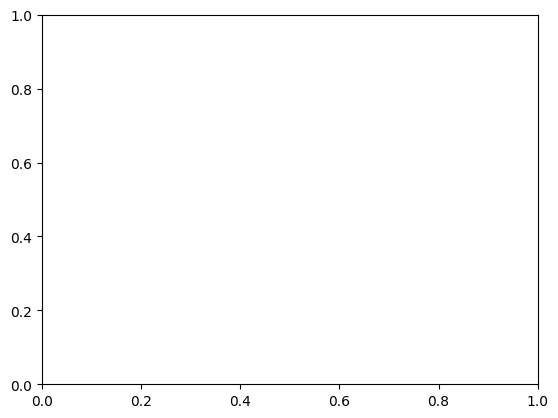

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
from tensorflow.keras.saving import register_keras_serializable

@register_keras_serializable()
class TemporalVAE(Model):
    def __init__(self, input_shape, latent_dim=64, filters=32):
        super(TemporalVAE, self).__init__()
        self.input_shape_ = input_shape
        self.latent_dim = latent_dim
        self.filters = filters
        
        self.encoder = self._build_encoder()
        
        self.decoder = self._build_decoder()
        
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")
    
    def _build_encoder(self):
        encoder_inputs = layers.Input(shape=self.input_shape_)
        
        x = layers.ConvLSTM2D(
            self.filters, (3,3), padding='same',
            return_sequences=True,
            kernel_regularizer=regularizers.l2(1e-4)
        )(encoder_inputs)
        x = layers.BatchNormalization()(x)
        
        x = layers.ConvLSTM2D(
            self.filters*2, (3,3), padding='same',
            return_sequences=False
        )(x)
        x = layers.BatchNormalization()(x)
        
        x = layers.Conv2D(
            self.filters*4, (3,3), strides=2, padding='same',
            activation='relu'
        )(x)
        x = layers.Conv2D(
            self.filters*8, (3,3), strides=2, padding='same',
            activation='relu'
        )(x)
        
        x = layers.Flatten()(x)
        z_mean = layers.Dense(self.latent_dim, name="z_mean")(x)
        z_log_var = layers.Dense(self.latent_dim, name="z_log_var")(x)
        
        return Model(encoder_inputs, [z_mean, z_log_var], name="encoder")
    
    def _build_decoder(self):
        latent_inputs = layers.Input(shape=(self.latent_dim,))
        
        x = layers.Dense(self.filters*8 * (self.input_shape_[1]//4) * (self.input_shape_[2]//4))(latent_inputs)
        x = layers.Reshape((self.input_shape_[1]//4, self.input_shape_[2]//4, self.filters*8))(x)
        
        x = layers.Conv2DTranspose(
            self.filters*4, (3,3), strides=2, padding='same',
            activation='relu'
        )(x)
        x = layers.Conv2DTranspose(
            self.filters*2, (3,3), strides=2, padding='same',
            activation='relu'
        )(x)
        
        x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(x)
        x = layers.Lambda(lambda x: tf.tile(x, [1, self.input_shape_[0], 1, 1, 1]))(x)
        
        x = layers.ConvLSTM2D(
            self.filters*2, (3,3), padding='same',
            return_sequences=True
        )(x)
        x = layers.BatchNormalization()(x)
        
        x = layers.ConvLSTM2D(
            self.filters, (3,3), padding='same',
            return_sequences=True
        )(x)
        x = layers.BatchNormalization()(x)
        
        decoder_outputs = layers.TimeDistributed(
            layers.Conv2D(
                self.input_shape_[-1], (3,3), padding='same',
                activation='tanh'
            )
        )(x)
        
        return Model(latent_inputs, decoder_outputs, name="decoder")
    
    @tf.function
    def sample(self, z_mean, z_log_var):
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
    
    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = self.sample(z_mean, z_log_var)
        reconstructions = self.decoder(z)
        return reconstructions
    
    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
            
        with tf.GradientTape() as tape:
            z_mean, z_log_var = self.encoder(data)
            z = self.sample(z_mean, z_log_var)
            reconstructions = self.decoder(z)
            
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.mse(data, reconstructions),
                    axis=(1,2,3)
                )
            )
            
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(
                    1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var),
                    axis=1
                )
            )
            
            total_loss = reconstruction_loss + kl_loss
            
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }
    
    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def get_config(self):
        return {
            "input_shape": self.input_shape_,
            "latent_dim": self.latent_dim,
            "filters": self.filters
        }

    @classmethod
    def from_config(cls, config):
        return cls(**config)

def generate_new_sequence(vae, latent_dim=64):
    """Generate a new sequence from random latent space sample"""
    random_latent = np.random.normal(size=(1, latent_dim))
    generated_sequence = vae.decoder.predict(random_latent, verbose=0)[0]
    return np.clip(generated_sequence, -1, 1)

def visualize_sequence(sequence, title="Generated Ocean Currents"):
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.close()
    
    img = ax.imshow(sequence[0,...,0], cmap='Blues', vmin=-1, vmax=1)
    plt.colorbar(img, ax=ax, label='Vorticity')
    plt_title = ax.set_title(f'{title}\nFrame 0/{len(sequence)}')
    
    def update(frame):
        img.set_array(sequence[frame,...,0])
        plt_title.set_text(f'{title}\nFrame {frame+1}/{len(sequence)}')
        return img, plt_title
    
    ani = FuncAnimation(
        fig, 
        update, 
        frames=len(sequence),
        interval=200,
        blit=True
    )
    
    return HTML(ani.to_html5_video())

if 'vae' in locals():
    print("Generating and visualizing new sequences...")
    for i in range(3):
        seq = generate_new_sequence(vae)
        display(visualize_sequence(seq, title=f"Generated Sequence {i+1}"))
else:
    print("Model not found by some reason.")

# GAN with video extensions (TGAN)

Training data shape: (8574, 9, 64, 64, 1)

Epoch 1/30


100%|██████████| 268/268 [05:06<00:00,  1.14s/it]



Epoch 2/30


100%|██████████| 268/268 [04:58<00:00,  1.11s/it]



Epoch 3/30


100%|██████████| 268/268 [04:58<00:00,  1.11s/it]



Epoch 4/30


100%|██████████| 268/268 [04:58<00:00,  1.11s/it]



Epoch 5/30


100%|██████████| 268/268 [04:58<00:00,  1.11s/it]



Epoch 6/30


100%|██████████| 268/268 [04:57<00:00,  1.11s/it]



Epoch 7/30


100%|██████████| 268/268 [04:57<00:00,  1.11s/it]



Epoch 8/30


100%|██████████| 268/268 [04:59<00:00,  1.12s/it]



Epoch 9/30


100%|██████████| 268/268 [04:58<00:00,  1.11s/it]



Epoch 10/30


100%|██████████| 268/268 [04:57<00:00,  1.11s/it]


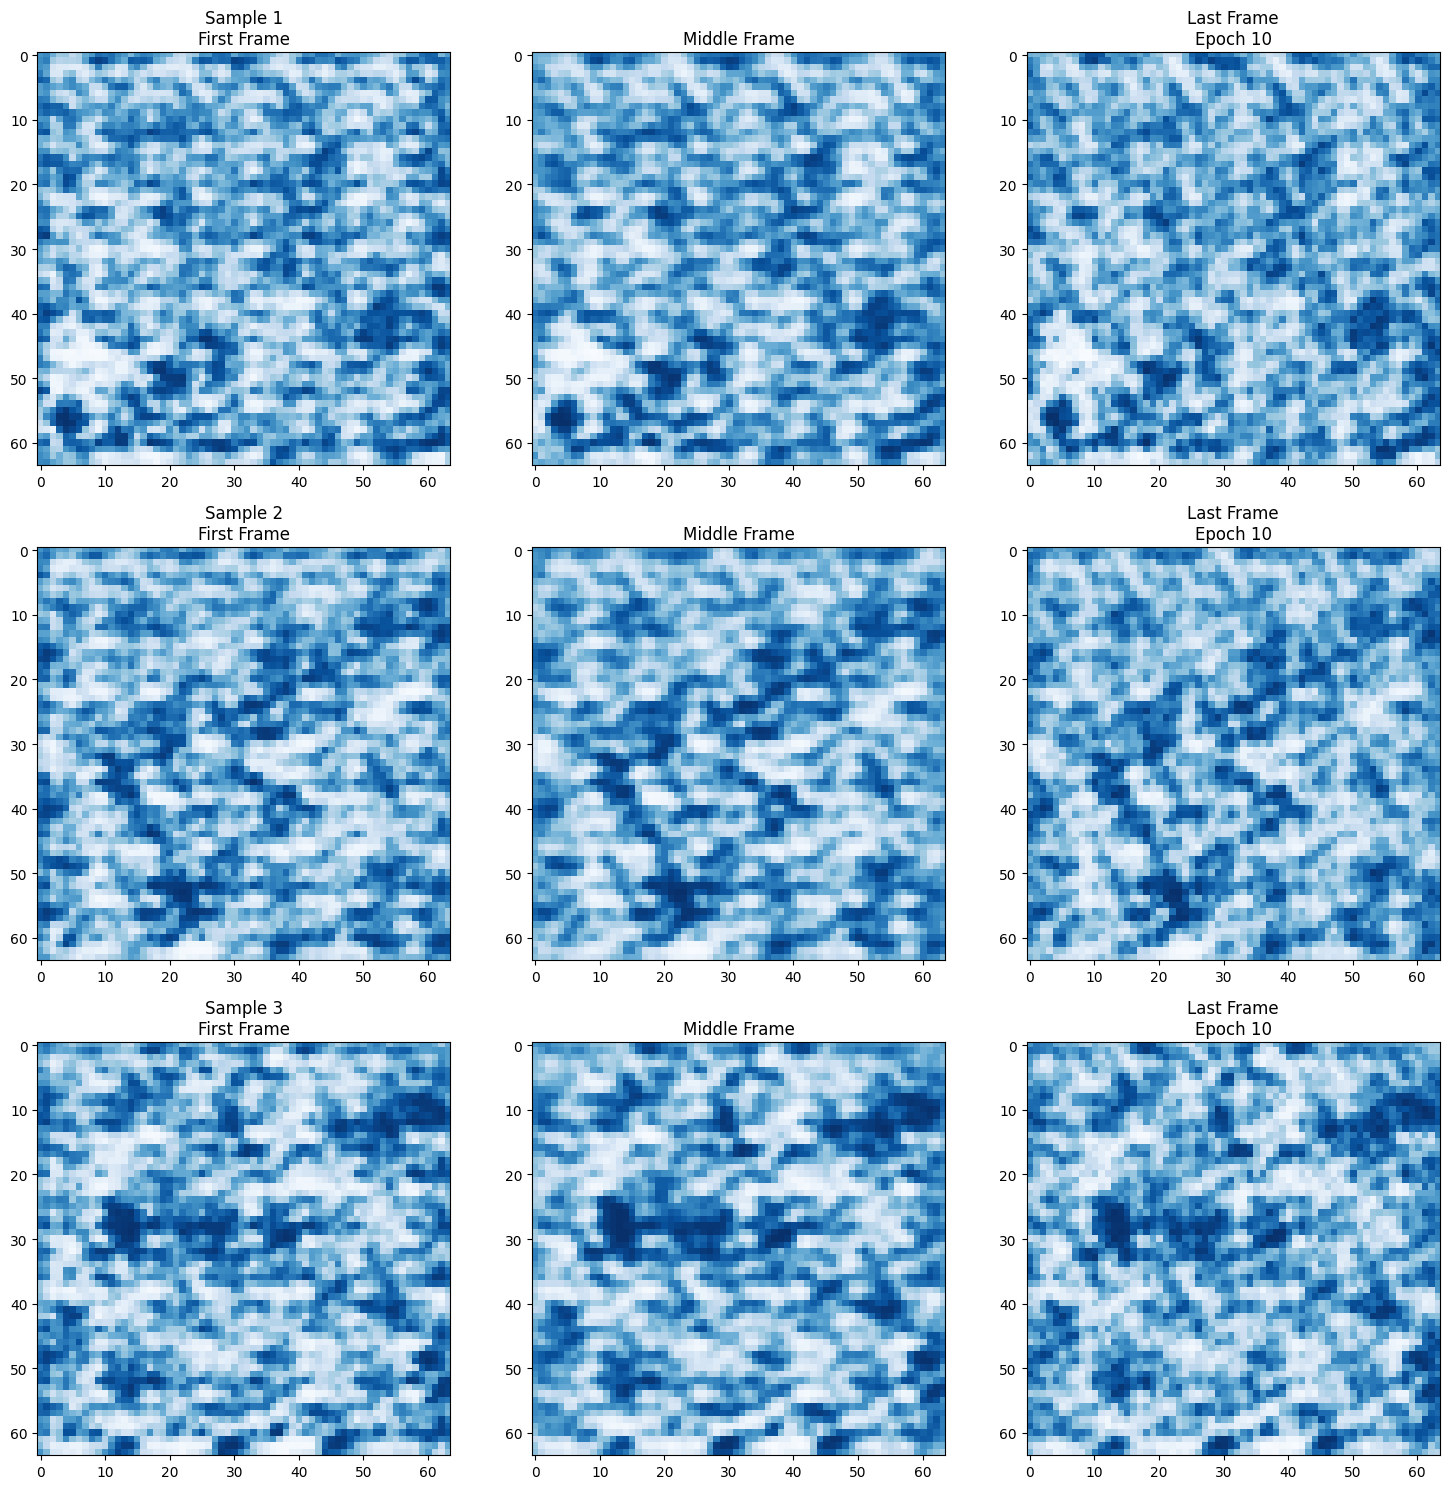


Epoch 11/30


100%|██████████| 268/268 [04:58<00:00,  1.12s/it]



Epoch 12/30


100%|██████████| 268/268 [04:59<00:00,  1.12s/it]



Epoch 13/30


100%|██████████| 268/268 [04:58<00:00,  1.11s/it]



Epoch 14/30


100%|██████████| 268/268 [04:57<00:00,  1.11s/it]



Epoch 15/30


100%|██████████| 268/268 [04:56<00:00,  1.11s/it]



Epoch 16/30


100%|██████████| 268/268 [04:56<00:00,  1.11s/it]



Epoch 17/30


100%|██████████| 268/268 [04:57<00:00,  1.11s/it]



Epoch 18/30


100%|██████████| 268/268 [04:58<00:00,  1.11s/it]



Epoch 20/30


100%|██████████| 268/268 [04:57<00:00,  1.11s/it]



Epoch 22/30


100%|██████████| 268/268 [04:58<00:00,  1.11s/it]



Epoch 23/30


100%|██████████| 268/268 [04:58<00:00,  1.11s/it]



Epoch 24/30


100%|██████████| 268/268 [04:57<00:00,  1.11s/it]



Epoch 25/30


100%|██████████| 268/268 [04:58<00:00,  1.11s/it]



Epoch 26/30


100%|██████████| 268/268 [04:57<00:00,  1.11s/it]



Epoch 27/30


100%|██████████| 268/268 [05:01<00:00,  1.12s/it]



Epoch 28/30


100%|██████████| 268/268 [04:59<00:00,  1.12s/it]



Epoch 29/30


100%|██████████| 268/268 [05:05<00:00,  1.14s/it]



Epoch 30/30


100%|██████████| 268/268 [05:09<00:00,  1.16s/it]


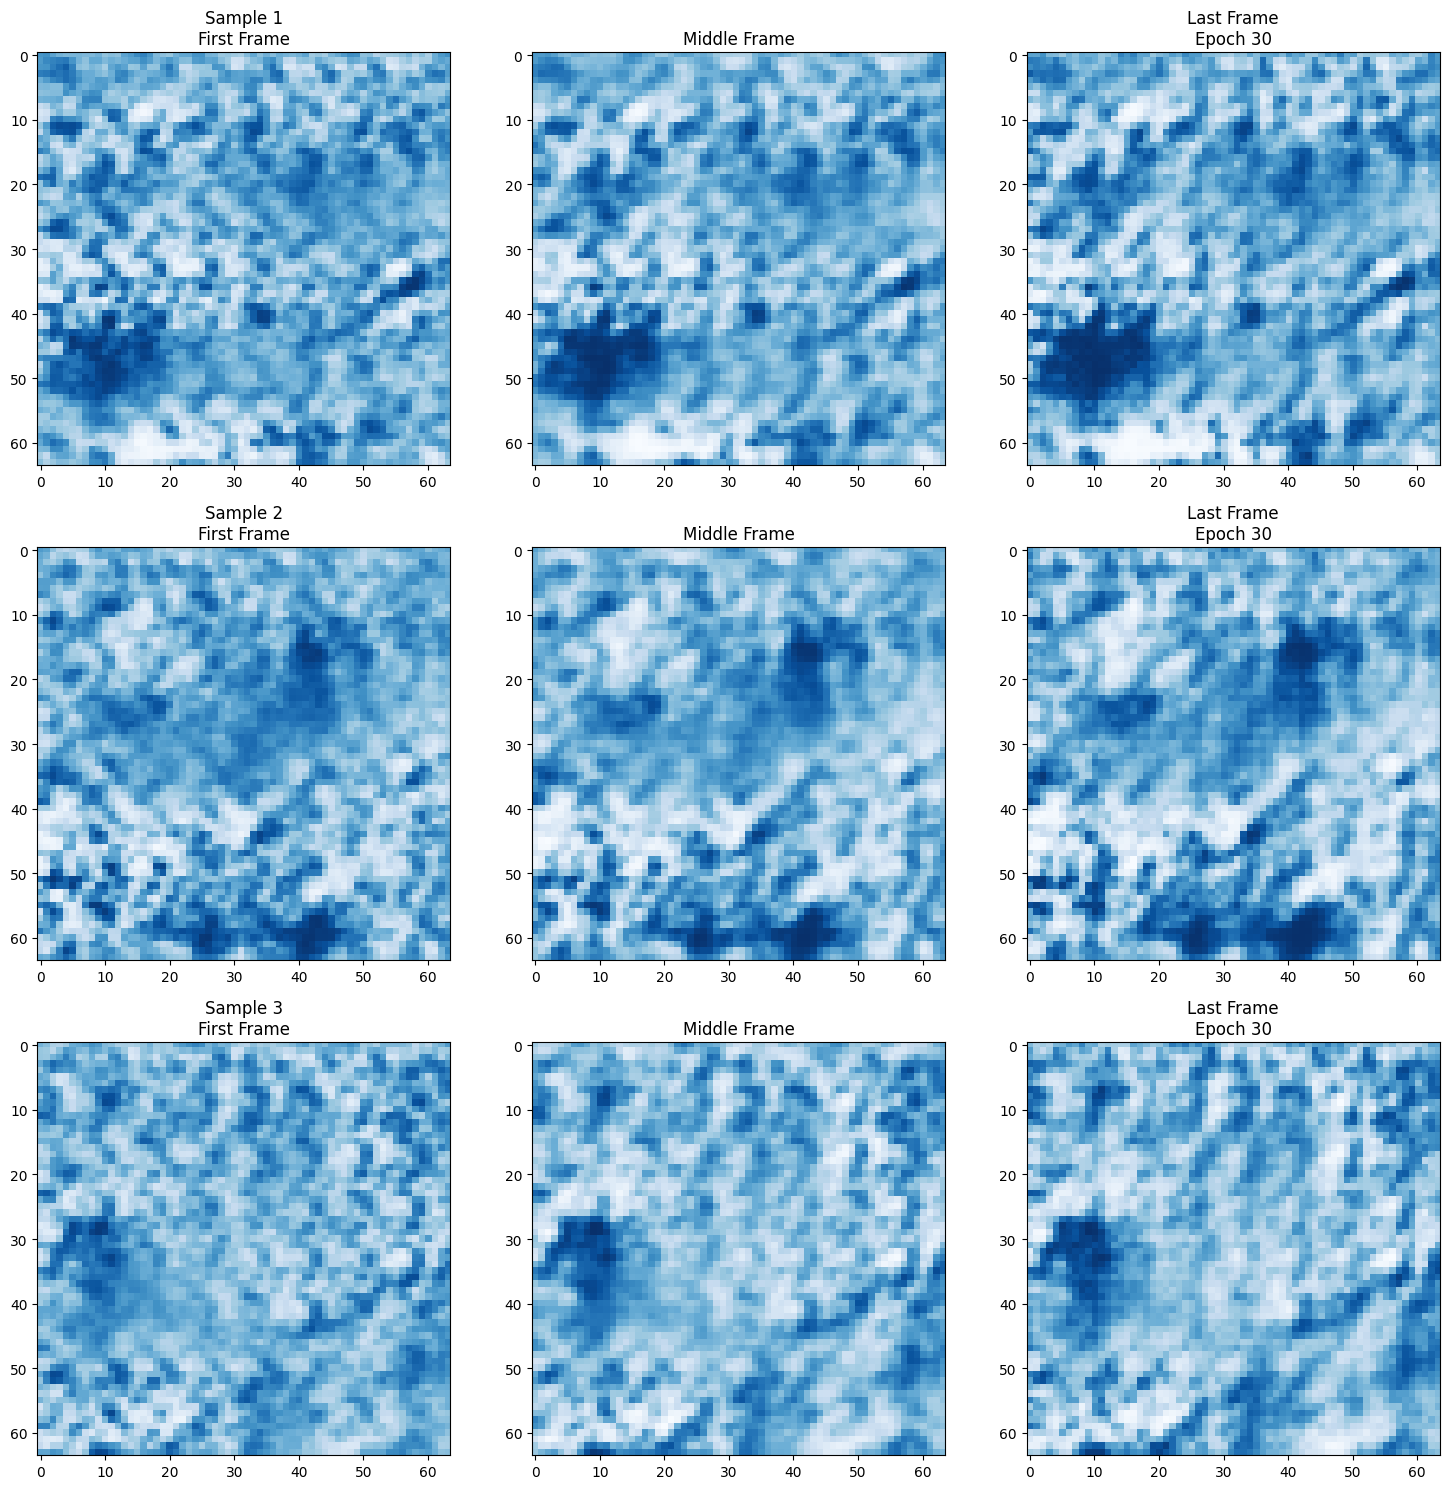

Training completed and models saved!


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def build_generator(latent_dim, seq_length=9, patch_size=64):
    noise_input = layers.Input(shape=(latent_dim,))
    x = layers.Dense(8 * 8 * 256, use_bias=False)(noise_input)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Reshape((8, 8, 256))(x)
    
    def create_timestep_model():
        model = Sequential([
            layers.Conv2DTranspose(128, (5,5), strides=(2,2), padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.LeakyReLU(),
            
            layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.LeakyReLU(),
            
            layers.Conv2DTranspose(32, (5,5), strides=(2,2), padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.LeakyReLU(),
            
            layers.Conv2D(1, (5,5), padding='same', activation='tanh')
        ])
        return model
    
    timestep_models = [create_timestep_model() for _ in range(seq_length)]
    outputs = [model(x) for model in timestep_models]
    
    output_sequence = layers.Concatenate(axis=1)([layers.Reshape((1, patch_size, patch_size, 1))(out) for out in outputs])
    
    return Model(noise_input, output_sequence)

def build_discriminator(seq_length=9, patch_size=64):
    model = Sequential([
        layers.Input(shape=(seq_length, patch_size, patch_size, 1)),
        
        layers.Conv3D(32, (3,5,5), strides=(1,2,2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        
        layers.Conv3D(64, (3,5,5), strides=(1,2,2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        
        layers.Conv3D(128, (3,5,5), strides=(1,2,2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

class TGAN(Model):
    def __init__(self, generator, discriminator, latent_dim):
        super(TGAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.latent_dim = latent_dim
        
    def compile(self, g_optimizer, d_optimizer, loss_fn):
        super(TGAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_fn = loss_fn
        self.g_loss_metric = tf.keras.metrics.Mean(name='g_loss')
        self.d_loss_metric = tf.keras.metrics.Mean(name='d_loss')
        
    @property
    def metrics(self):
        return [self.g_loss_metric, self.d_loss_metric]
        
    def train_step(self, real_sequences):
        batch_size = tf.shape(real_sequences)[0]
        
        noise = tf.random.normal([batch_size, self.latent_dim])
        with tf.GradientTape() as d_tape:
            generated_sequences = self.generator(noise, training=True)
            real_output = self.discriminator(real_sequences, training=True)
            fake_output = self.discriminator(generated_sequences, training=True)
            
            real_loss = self.loss_fn(tf.ones_like(real_output), real_output)
            fake_loss = self.loss_fn(tf.zeros_like(fake_output), fake_output)
            d_loss = (real_loss + fake_loss) / 2
            
        d_gradients = d_tape.gradient(d_loss, self.discriminator.trainable_variables)
        self.d_optimizer.apply_gradients(
            zip(d_gradients, self.discriminator.trainable_variables))
        
        noise = tf.random.normal([batch_size, self.latent_dim])
        with tf.GradientTape() as g_tape:
            generated_sequences = self.generator(noise, training=True)
            fake_output = self.discriminator(generated_sequences, training=True)
            g_loss = self.loss_fn(tf.ones_like(fake_output), fake_output)
            
        g_gradients = g_tape.gradient(g_loss, self.generator.trainable_variables)
        self.g_optimizer.apply_gradients(
            zip(g_gradients, self.generator.trainable_variables))
        
        self.g_loss_metric.update_state(g_loss)
        self.d_loss_metric.update_state(d_loss)
        
        return {
            "g_loss": self.g_loss_metric.result(),
            "d_loss": self.d_loss_metric.result()
        }

def train_tgan(X_train, epochs=10, batch_size=32, latent_dim=128):
    generator = build_generator(latent_dim)
    discriminator = build_discriminator()
    
    tgan = TGAN(generator, discriminator, latent_dim)
    
    g_optimizer = Adam(learning_rate=1e-4, beta_1=0.5)
    d_optimizer = Adam(learning_rate=1e-4, beta_1=0.5)
    loss_fn = tf.keras.losses.BinaryCrossentropy()
    
    tgan.compile(g_optimizer, d_optimizer, loss_fn)
    
    dataset = tf.data.Dataset.from_tensor_slices(X_train)
    dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)
    
    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        for batch in tqdm(dataset):
            tgan.train_step(batch)
        
        if (epoch + 1) % 10 == 0:
            generate_and_save_samples(generator, epoch+1, latent_dim)
    
    return tgan

def generate_and_save_samples(generator, epoch, latent_dim, n_samples=3):
    noise = tf.random.normal([n_samples, latent_dim])
    generated = generator(noise, training=False)
    
    plt.figure(figsize=(15, 5*n_samples))
    for i in range(n_samples):
        plt.subplot(n_samples, 3, i*3+1)
        plt.imshow(generated[i,0,...,0], cmap='Blues', vmin=-1, vmax=1)
        plt.title(f"Sample {i+1}\nFirst Frame")
        
        plt.subplot(n_samples, 3, i*3+2)
        plt.imshow(generated[i,len(generated[i])//2,...,0], cmap='Blues')
        plt.title("Middle Frame")
        
        plt.subplot(n_samples, 3, i*3+3)
        plt.imshow(generated[i,-1,...,0], cmap='Blues')
        plt.title(f"Last Frame\nEpoch {epoch}")
    
    plt.tight_layout()
    plt.savefig(f"generated_samples_epoch_{epoch}.png")
    plt.show()

try:
    print(f"Training data shape: {X_train.shape}")
    
    tgan = train_tgan(X_train, epochs=30, batch_size=32)
    
    tgan.generator.save("tgan_generator.h5")
    tgan.discriminator.save("tgan_discriminator.h5")
    print("Training completed and models saved!")
    
except Exception as e:
    print(f"Training failed: {str(e)}")

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
import tensorflow as tf

def generate_sequence(generator, latent_dim=128):
    noise = tf.random.normal([1, latent_dim])
    generated = generator(noise, training=False)
    
    sequence = np.moveaxis(generated.numpy(), -1, 0)
    sequence = np.squeeze(sequence) 
    
    if sequence.ndim == 4 and sequence.shape[2] == 1:
        sequence = sequence[:,:,0,:]
        sequence = np.moveaxis(sequence, -1, 0)
    
    return sequence

def create_patch_animation(sequence, fps=5):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.axis('off')
    ax.set_title("Ocean Current Patch Evolution", pad=20)

    img = ax.imshow(sequence[0], cmap='Blues', vmin=-1, vmax=1)
    plt.colorbar(img, ax=ax, label='Vorticity')
    
    def update(frame):
        img.set_array(sequence[frame])
        ax.set_xlabel(f"Timestep {frame+1}/{len(sequence)}", labelpad=10)
        return img,
    
    ani = FuncAnimation(
        fig,
        update,
        frames=len(sequence),
        interval=1000/fps,
        blit=True
    )
    plt.close()
    return ani

def display_animation(generator):
    try:
        sequence = generate_sequence(generator)
        ani = create_patch_animation(sequence)
        display(HTML(ani.to_html5_video()))
        return ani
    except Exception as e:
        print(f"Error creating animation: {str(e)}")
        return None

try:
    generator = tf.keras.models.load_model("tgan_generator.h5")
    test_noise = tf.random.normal([1, 128])
    test_output = generator(test_noise, training=False)
    ani = display_animation(generator)
    if ani:
        ani.save('patch_evolution.mp4', writer='ffmpeg', fps=5)
    
except Exception as e:
    print(f"Error: {str(e)}")